No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[5.0, 9.0, 14.0, 14.0, 7.0, 8.0, 6.0, 8.0, 10.0, 5.0, 11.0, 9.0, 12.0, 11.0, 10.0, 5.0, 14.0, 5.0, 10.0, 16.0, 17.0, 15.0, 15.0, 10.0, 19.0, 10.0, 11.0, 11.0, 6.0, 15.0, 8.0, 16.0, 12.0, 17.0, 17.0, 6.0, 15.0, 15.0, 15.0, 11.0, 15.0, 12.0, 16.0, 15.0, 15.0, 8.0, 18.0, 19.0, 18.0, 13.0, 17.0, 17.0, 15.0, 11.0, 19.0, 18.0, 18.0, 14.0, 16.0, 12.0, 7.0, 21.0, 18.0, 7.0, 17.0, 18.0, 20.0, 18.0, 11.0, 16.0, 16.0, 18.0, 18.0, 17.0, 19.0, 18.0, 19.0, 19.0, 19.0, 19.0, 20.0, 18.0, 17.0, 12.0, 20.0, 19.0, 17.0, 19.0, 12.0, 19.0, 21.0]


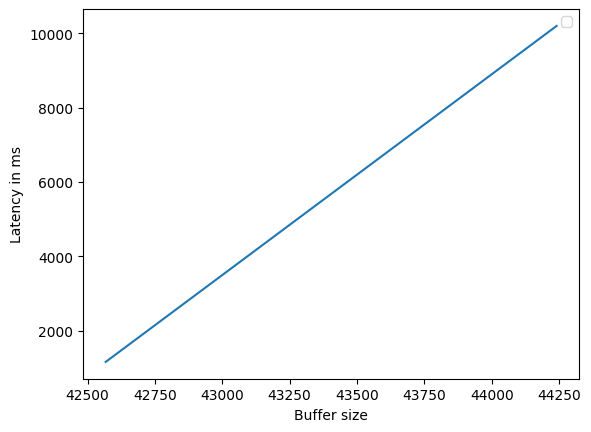

In [44]:
import matplotlib.pyplot as plt 
import numpy as np
y=open("lauda.txt","r")
ans=[]
min_latency,max_latency,fifty_percentile_latency,mean_latency=[],[],[],[]
for index,i in enumerate(y):
    if((index+1)%3==0):
        lol=[float(j) for j in i[:len(i)-1].split(",")]
        min_latency.append(lol[0])
        max_latency.append(lol[1])
        fifty_percentile_latency.append(lol[2])
        mean_latency.append(lol[3])
print(min_latency)
X=range(1000,10001,100)
# plt.plot(X,min_latency,label="min latency")
# plt.scatter(X,mean_latency,label="mean latency")
# plt.plot(X,fifty_percentile_latency,label="fifty percentile")
# plt.plot(X,max_latency,label="max latency")
plt.xlabel("Buffer size")
plt.ylabel("Latency in ms")
plt.plot(np.unique(mean_latency), np.poly1d(np.polyfit(mean_latency, X, 1))(np.unique(mean_latency)))

plt.legend()

best fit line:
y = 42695.75 + 0.12x


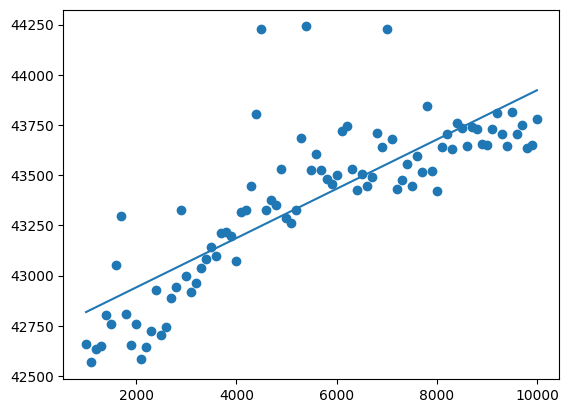

In [43]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, mean_latency)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, mean_latency)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
